In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nircoloring.evaluation.config import *
from nircoloring.evaluation.utils import *

/home/ayk/miniforge3/envs/nir-coloring/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Serengeti Night Dataset (Small)
Comparing IHFS and CycleGAN in different variations

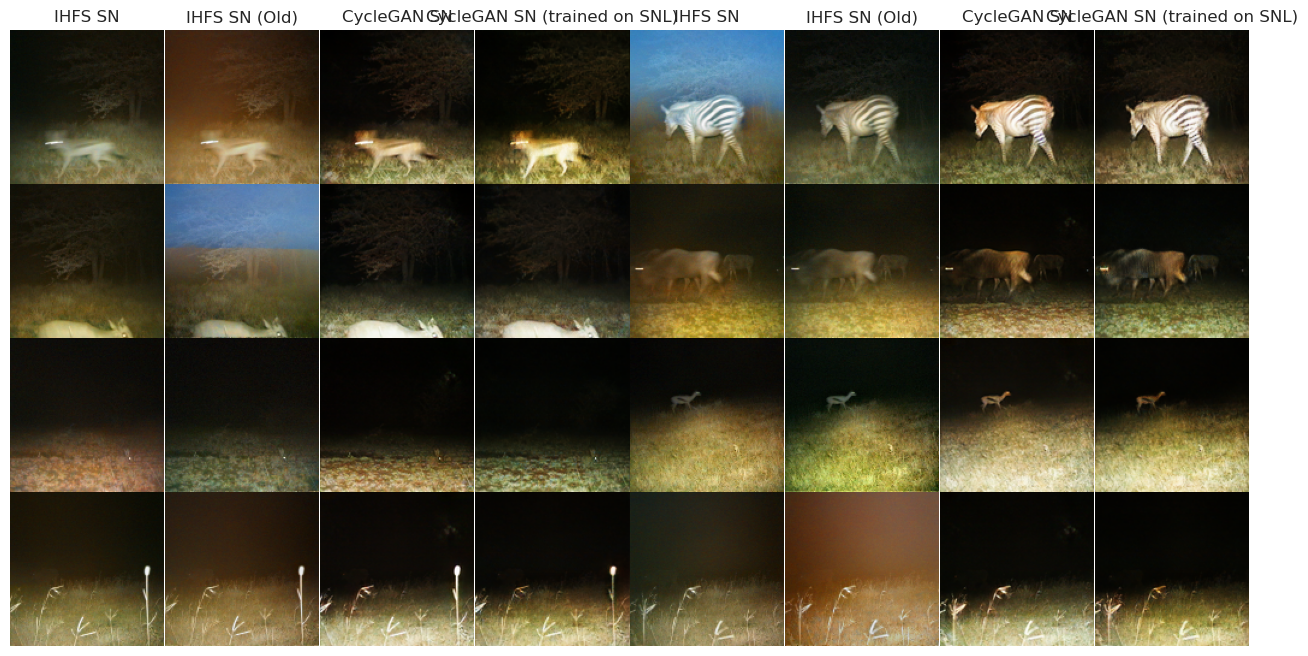

In [3]:
plot_grid([ihfs_serengeti_night, ihfs_serengeti_night_old, cycle_gan_serengeti_night,
           cycle_gan_serengeti_night_trained_on_serengeti_night_large], columns=2)

In [4]:
result_to_quan_df([ihfs_serengeti_night, ihfs_serengeti_night_old, cycle_gan_serengeti_night,
                  cycle_gan_serengeti_night_trained_on_serengeti_night_large])

/home/ayk/miniforge3/envs/nir-coloring/lib/python3.11/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1699115971163/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
Evaluating brisque: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]


,NIQE,BRISQUE,FID
IHFS SN,14.525338,-2.307477,100.794478
IHFS SN (Old),14.138283,-0.878237,97.841190
CycleGAN SN,13.898928,-5.737576,95.262441
CycleGAN SN (trained on SNL),14.065614,-3.518254,94.491053


## Validate CleanFID and ClipFID implementation
Because we use `clean-fid` but implement it into our own evaluation framework, we need to validate the correctness of the values.

### CleanFID 

In [5]:
from cleanfid import fid
from PIL import Image
from pathlib import Path
import torch
from tempfile import TemporaryDirectory

print("CleanFID without resized dataset:",
      fid.compute_fid(ihfs_serengeti_night.directory, ihfs_serengeti_night.fid_reference.directory,
                      device=torch.device("cpu"), mode="clean"))

print("\n\n")

with TemporaryDirectory() as new_dir:
    filename: Path
    for image, filename in zip(ihfs_serengeti_night.fid_reference.load_images(),
                               ihfs_serengeti_night.fid_reference.image_filenames):
        pil_image = Image.fromarray(image)
        pil_image.save(join(new_dir, filename.stem + ".png"))

    print("CleanFID with resized dataset:",
          fid.compute_fid(ihfs_serengeti_night.directory, new_dir, device=torch.device("cpu"), mode="clean"))

compute FID between two folders
Found 250 images in the folder /home/ayk/dev/personal/uni/nir-coloring/nircoloring/../results/ihfs/serengeti-night


FID serengeti-night : 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


Found 250 images in the folder /home/ayk/dev/personal/uni/nir-coloring/nircoloring/../data/dataset/out/serengeti-incandescent/testB


FID testB : 100%|██████████| 8/8 [00:20<00:00,  2.50s/it]


CleanFID without resized dataset: 128.95360067209126


compute FID between two folders
Found 250 images in the folder /home/ayk/dev/personal/uni/nir-coloring/nircoloring/../results/ihfs/serengeti-night


FID serengeti-night : 100%|██████████| 8/8 [00:17<00:00,  2.21s/it]


Found 250 images in the folder /tmp/tmp_73new6u


FID tmp_73new6u : 100%|██████████| 8/8 [00:19<00:00,  2.40s/it]


CleanFID with resized dataset: 100.79447772068096


# Serengeti Night Large Dataset
Comparing IHFS and CycleGAN 

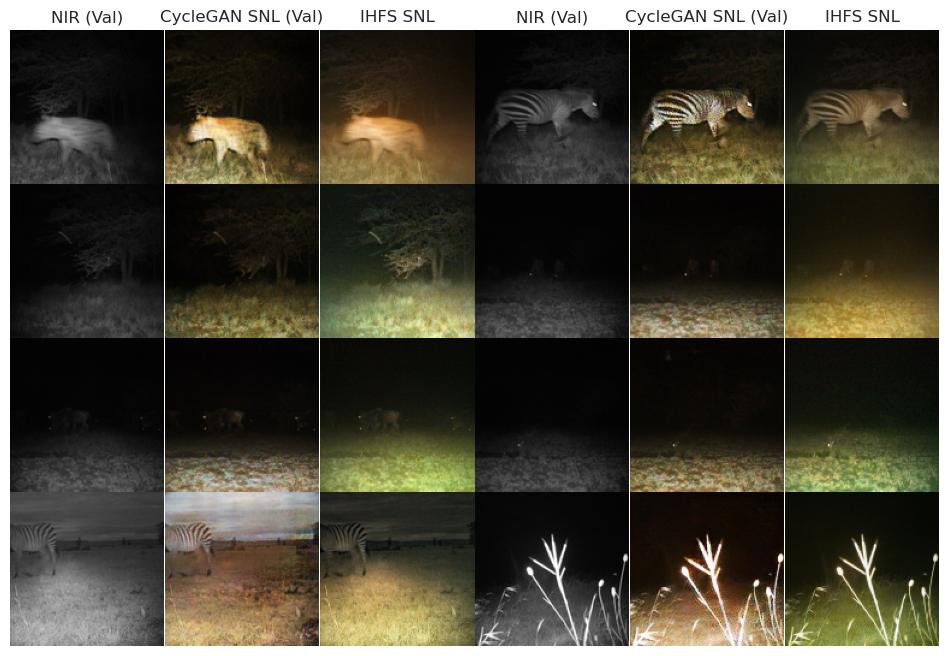

In [6]:
plot_grid([serengeti_night_large_nir_val, cycle_gan_serengeti_night_large_val, ihfs_serengeti_night_large_val],
          columns=2)

In [8]:
result_to_quan_df(
    [cycle_gan_serengeti_night_large_val, ihfs_serengeti_night_large_val, unconditional_serengeti_night_large])

Evaluating brisque: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]


,NIQE,BRISQUE,FID
CycleGAN SNL (Val),13.910111,-5.024518,72.273087
IHFS SNL,16.124584,-0.656143,81.595588
Unconditional SNL,14.771756,0.780029,55.013029
